# Logistic Regression from scratch
## Introduction

Logistic Regression is a specific type of generalized linear model. It is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.


Logistic Regression model computes a weighted sum of the input features (plus a bias term) and outputs the logistic of this result:

#### p = sigmoid(X @ theta)

where:
p = is the vector of predicted probabilities.

sigmoid = is the sigmoid function, which squashes the values of the linear combination to lie between 0 and 1

#### sigmoid(x) = 1 / (1 + e^(-x))

X = is the design matrix, where each row represents an instance in the dataset

@ = is the matrix multiplication operator

theta = is the vector of model parameters

@ = is the matrix multiplication operator



This sigmoid function fits an "S" shaped logistic function from 0 to 1. The resulting vector values represent 0 if p<0.5 and 1 if p>= 0.5

So, now we understand how the model works and how to make predictions. The next step is training. The objective of training is to set the parameter vector "theta" so that the model estimates high probabilities for positive instances and low probabilities for negative instances. The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression, called the log loss function.


The log Loss function plays a crucial role in evaluating the model's performance and guiding the optimization process. It measures the discrepancy between the model's predicted probabilities and the actual class labels. By minimizing the loss function, the model is trained to make more accurate predictions.

The log loss function is minimized using an optimization algorithm gradient descent. This way we can find the value of Theta than minimise the cost function.  



References:

https://gist.github.com/yusugomori/4462221

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.). O'Reilly Media.

Import libraries

In [2]:
import numpy as np

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Loand data set

In [3]:
iris = load_iris()

In [4]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Use the first two columns as X

> Indented block



In [5]:
#loading first two columns as X
X = iris["data"][:, :2]

Now the target values are 0,1 and 2. For the propouse of this study, If the last column value is ‘Iris-setosa” the target value will be 1. For 'versicolor', 'virginica', target value will be 0.

In [6]:
#change labels to 0 if the If the last column value is ‘Iris-setosa” - 1
y= np.zeros_like(iris.target)
y[iris['target'] == 0] = 1

In [7]:
y.shape

(150,)

In [8]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Lets plot the new data set to separate iris setosa from the other ones.

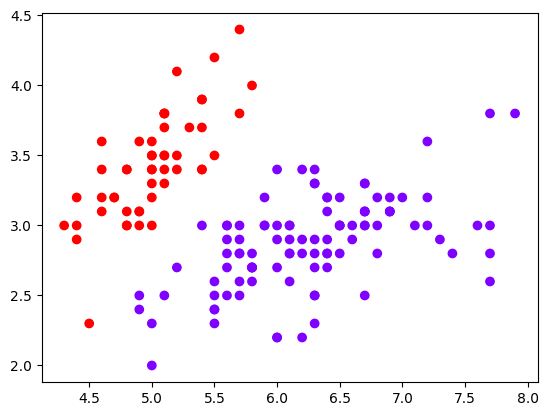

In [9]:
#ploting
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()


Create a function to split data into train and test sets. This step is commonly performed using the train_test_split function from the sklearn.model_selection module. The function takes the features (X) and labels (y) as input and splits them into training and testing sets. The test_size parameter specifies the proportion of data to be used for testing.

In [10]:
# This is just to explore how the split works.
# The shortest way is to use import train_test_split from sklearn.model_selection

def split_train_test (percent, X, y):
#Function that takes a percentage of data as input and splits the data into training and test sets.
# The 'X' parameter represents the data features and the 'y' parameter represents the target values.
    num_rows = len (y)
    #generates random number
    permutation = np.random.permutation(num_rows)
    #mix the data randomly
    X = X[permutation]
    y = y [permutation]
    #separates data 70%
    split_index = int(num_rows * percent)
    train = (X[:split_index], y[:split_index])
    test = (X[split_index:], y[split_index:])
    return train, test

we start the Logistic Regression model creating a sigmoid fuction.

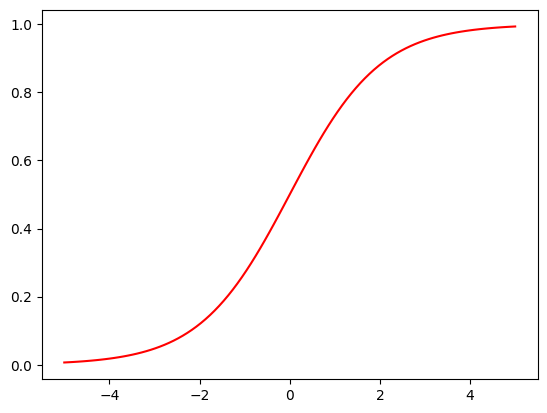

In [11]:
# creating function sigmoid
def sigmond(z):
    return 1/(1+np.exp(-z))

x_values = np.linspace(-5, 5,100)

plt.plot(x_values, sigmond(x_values), color = 'red')

In logistic regression, the negative log likelihood function is a common cost/loss function used to estimate the parameters of the model.
The negative log likelihood is a measure used in logistic regression to quantify how well the model predicts the true labels. The function calculates the average (mean) negative log likelihood across all samples, indicating how far off the predicted probabilities are from the actual values. The goal is to minimize this value when training a logistic regression model.



In [12]:
#Cost function: It quantifies the error between the model's predictions and the desired output.

def log_likehood (y, y_calc):
    m = len(y)
    return -(y.T*np.log(y_calc) + (1+y).T*np.log(1-y_calc)).mean()



To calculate global minimum, the derivatives of the loss function with respect to each weight is obtained. These derivatives indicate how much the loss would change if we modified the parameters. For each instance, this function calculates the prediction error, multiplies it by the corresponding Xi value, and then computes the average over all training instances.




In [13]:

def gradient ( y_calc, y, X):
    #fuction that calculates the gradient.


    num_rows = len(y) #termines the number of samples in the dataset

    #y.reshape(-1,1)-y_calc reshape matrix to do the difference
    #.T@ X: Performs matrix multiplication between the transposed y_diff and the feature matrix X.
    #Dividing by the number of rows, it computes the average gradient across all samples. Getting the direction and magnitude of the steepest.

    return ((y.reshape(-1,1)-y_calc).T@X)/num_rows


Then, we create a function to perform gradient descent. This function iteratively updates the weights based on the calculated gradients.

Within the gradient descent function, we update the weights by subtracting the product of the derivative and the learning rate."

In [38]:
def gradient_ascent (X, y, epoch, alpha, num_print_debug = 100):
    num_rows, n = X.shape  # Get the number of samples and features
    theta = np.random.rand(1,2) # Initialize parameters randomly
    print_index = int(epoch/num_print_debug)  # Determine when to print debug information
    loss = []  # List to store loss values during training
    for i in range (epoch):
        h = sigmond(X@theta.T) # Calculate the sigmoid of the linear combination of features and parameters
        theta += alpha * gradient (h, y , X) # Update parameters using gradient ascent
        if i%print_index == 0: #Checks whether it's time to print the current loss for debugging purposes.
            cur_loss = log_likehood (y, h)
            loss.append(cur_loss)
            print(cur_loss)
    return theta, loss


Finally, we create a function to evaluate the model's accuracy on the test and train data.

In [39]:
def check_accurancy (X, y, theta, name):
    h = sigmond(X@theta.T) # Compute the predicted probabilities using the logistic function
    pred = np.zeros_like(h) # Create an array of zeros with the same shape as h
    pred[h>= 0.5] =1 ## Set values in 'pred' to 1 where the predicted probability is greater than or equal to 0.5
    accuracy = sum([x==y for x,y in zip(pred, y )])/len(y) ## Compute accuracy by comparing predicted values ('pred') with actual values ('y')
    likelihood = log_likehood(y,h)  ## Compute the log likelihood based on the actual values
    print (f"{name} precision : {accuracy*100}%, log likelihood {likelihood}")

1- split the data into train and test

In [40]:
train, test = split_train_test(0.7, X, y)

2- Train the model to get its parameters

In [41]:
theta, loss = gradient_ascent(train[0], train [1], 100000, 0.1, 400)


Text(0, 0.5, 'log likelihood')

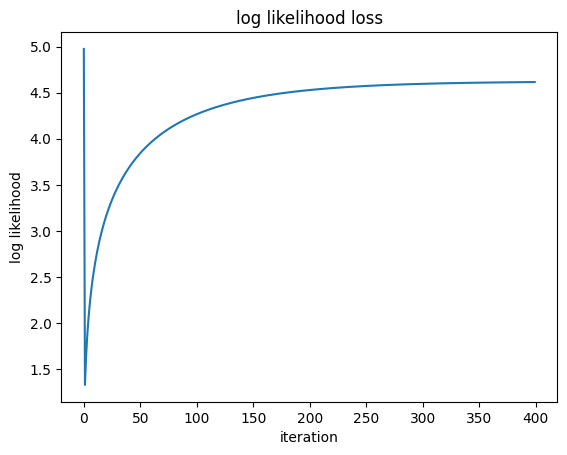

In [42]:
plt.plot(loss)
plt.title('log likelihood loss')
plt.xlabel('iteration')
plt.ylabel('log likelihood')

In [43]:
check_accurancy(train[0], train[1], theta, 'train')

train precision : [99.04761905]%, log likelihood 4.615462221823861


In [44]:
check_accurancy(test[0], test[1], theta, 'test')

test precision : [100.]%, log likelihood 5.445647022374085
